In [1]:
import numpy as np
import time
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from datetime import datetime

from functions_metaheuristica import gerador_instancias
from functions_metaheuristica import ils
from functions_metaheuristica import termicas_guloso
from functions_metaheuristica import busca_local
from functions_metaheuristica import busca_local2
from functions_metaheuristica import perturbacao
from functions_metaheuristica import solucao_viavel
from functions_metaheuristica import validador

import time
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Parâmetros

### gerador_instancias:
###### qtd_term -> Quantidade de térmicas
###### lim_inf_min -> Mínimo de limite inferior
###### lim_inf_max -> Máximo de limite inferior
###### lim_sup_min -> Mínimo de limite superior
###### lim_sup_max -> Máximo de limite superior
###### t_on_min -> Mínimo de Ton
###### t_on_max -> Máximo de Ton
###### t_off_min -> Mínimo de Toff
###### t_off_max -> Máximo de Toff
###### custo_min -> Custo Mínimo
###### custo_max -> Custo Máximo
###### periodos -> Quantidade de períodos de tempo
###### demanda_min -> Mínimo de demanda
###### demanda_max -> Máximo de Demanda

### termicas_guloso:

###### df_terms -> Térmicas e requisitos (ton, toff, limite superior e inferior)
###### demanda -> Demanda por período
###### size -> Quantidade de períodos

### solucao_viavel:

###### df_resultado -> Resultado a ser testado
###### df_regras -> Térmicas e requisitos (ton, toff, limite superior e inferior)

### busca_local2:

###### df_resultado -> Resultado encontrado no guloso
###### df_regras -> Térmicas e requisitos (ton, toff, limite superior e inferior)
###### max -> Máximo de iterações sem melhoria na busca local
###### mudancas -> Quantidade de períodos vizinhos para mudar

### perturbacao:

###### df -> Solução que deve ser perturbada
###### df_regras -> Térmicas e requisitos (ton, toff, limite superior e inferior)
###### n_mudancas -> Quantidade de perturbações
###### t_mudancas -> Quantidade de termicas perturbadas

### ils:

###### df_resultado -> Resultado encontrado no guloso
###### df_regras -> Térmicas e requisitos (ton, toff, limite superior e inferior)
###### max_iteracoes_ils -> Máximo de iterações no ILS
###### max_iteracoes_bl -> Máximo de iterações sem melhoria na busca local
###### mudancas_bl -> Quantidade de períodos vizinhos para mudar na busca local
###### n_mudancas -> Quantidade de perturbações por ciclo
###### t_mudancas -> Quantidade de termicas perturbadas

### validador:

###### df_resultado -> Resultado encontrado no guloso, BL ou ILS
###### df_regras -> Térmicas e requisitos (ton, toff, limite superior e inferior)

In [2]:
### Instâncias de Teste

df_term = pd.read_csv("df_term.csv").drop(columns="Unnamed: 0")
demanda = np.loadtxt("demanda.csv")
df_resultado_guloso = pd.read_csv('Resultado_02112025.csv')

In [2]:
%%time
### Instâncias de Teste
df_guloso_nova_term = pd.read_csv("df_guloso_nova_term_091125.csv")
df_nova_term = pd.read_csv("df_nova_term_091125.csv")
demanda = np.loadtxt("demanda_nova_term_091125.csv")
#df_guloso_nova_term = termicas_guloso(df_nova_term,demanda,size = len(demanda))
#print("Custo total: ",df_guloso_nova_term.custo.sum())

CPU times: total: 15.6 ms
Wall time: 8.4 ms


In [2]:
%%time
#df_guloso_nova_term = pd.read_csv("df_guloso_nova_term_091125.csv")
df_term_david = pd.read_csv("df_term_david.csv")
demanda_david = np.loadtxt("demanda_david.csv")
df_guloso_david = termicas_guloso(df_term_david,demanda_david,size = len(demanda_david))

Térmica acionada:  g1 Demanda atual:  90.0 Demanda temp:  90.0 Tempo:  0 Custo:  900.0 Tempo acionada:  1
Térmica acionada (Obrigatória):  g1 Demanda atual:  90.0 Demanda temp:  10 Demanda Utilizada:  10 Tempo:  1 Custo:  100 Tempo acionada:  2
Térmica acionada:  g1 Demanda atual:  90.0 Demanda temp:  90.0 Demanda Utilizada:  80.0 Tempo:  1 Custo:  900.0 Tempo acionada:  2
Térmica acionada:  g1 Demanda atual:  110.0 Demanda temp:  100 Demanda Utilizada:  100 Tempo:  2 Custo:  1000 Tempo acionada:  3
Térmica acionada:  g2 Demanda atual:  110.0 Demanda temp:  110.0 Demanda Utilizada:  10.0 Tempo:  2 Custo:  1200.0 Tempo acionada:  1
Térmica acionada (Obrigatória):  g2 Demanda atual:  90.0 Demanda temp:  10 Demanda Utilizada:  10 Tempo:  3 Custo:  200 Tempo acionada:  2
Térmica acionada:  g1 Demanda atual:  90.0 Demanda temp:  90.0 Demanda Utilizada:  80.0 Tempo:  3 Custo:  1000.0 Tempo acionada:  4
Térmica acionada (Obrigatória):  g2 Demanda atual:  90.0 Demanda temp:  10 Demanda Utiliza

In [3]:
df_guloso_david.custo.sum()

7900.0

### Gerar novas Instâncias

In [4]:
df_nova_term,demanda = gerador_instancias(20,1,10,80,120,1,10,1,10,50,80,50,300,1200)

In [3]:
#df_nova_term

In [6]:
df_nova_term.to_csv("df_nova_term_091125.csv",index=False)
np.savetxt("demanda_nova_term_091125.csv", demanda, delimiter=",")

In [2]:
df_nova_term = pd.read_csv("df_nova_term_091125.csv")
demanda = np.loadtxt("demanda_nova_term_091125.csv")

In [4]:
demanda

array([ 653.,  726.,  995.,  648., 1010., 1174., 1003.,  541., 1160.,
       1178.,  586.,  726., 1146.,  564.,  894.,  737.,  992.,  998.,
       1160.,  963.,  828.,  645.,  812.,  799., 1153.,  587., 1077.,
        719.,  715.,  456.,  799.,  816.,  413.,  560.,  364.,  535.,
       1033.,  525.,  895.,  573.,  328.,  652.,  654.,  784.,  771.,
        819.,  876., 1141.,  642.,  558.])

### Guloso

In [4]:
df_guloso_nova_term = termicas_guloso(df_nova_term,demanda,len(demanda))

In [4]:
df_guloso_nova_term.custo.sum()

2222029.0

In [5]:
solucao_viavel(df_guloso_nova_term,df_nova_term)

True

In [6]:
validador(df_guloso_nova_term,df_nova_term)

Solução validada!


In [17]:
df_guloso_nova_term.to_csv("df_guloso_nova_term_091125.csv",index=False)

### Busca Local

In [8]:
#df_resultado_bl = busca_local(df_guloso_nova_term,df_nova_term,100,mudancas=10)

In [9]:
#df_resultado_bl.loc[(df_resultado_bl.tempo==17)]

In [11]:
#df_resultado_bl.custo.sum()

In [11]:
melhor_dif = 0
melhor_bl = pd.DataFrame()
for i in range(20):
    df_termicas_bl = busca_local2(df_guloso_nova_term,df_nova_term,max=200,mudancas=10)
    dif = df_termicas_bl.custo.sum()-df_guloso_nova_term.custo.sum()
    if dif<melhor_dif:
        melhor_dif = dif
        melhor_bl = df_termicas_bl.copy()
        print("Melhor Dif: ",melhor_dif)
        validador(df_termicas_bl,df_nova_term)

Não foi encontrado uma solução melhor!!!
Não foi encontrado uma solução melhor!!!
Não foi encontrado uma solução melhor!!!
Não foi encontrado uma solução melhor!!!
Não foi encontrado uma solução melhor!!!
Foi encontrado uma solução melhor!
Solução melhor encontrada no tempo:  43 mudança na térmica:  term_16  custo atual:  2221696.0  custo anterior: 2222029.0
Melhor Dif:  -333.0
Solução validada!
Não foi encontrado uma solução melhor!!!
Não foi encontrado uma solução melhor!!!
Foi encontrado uma solução melhor!
Solução melhor encontrada no tempo:  17 mudança na térmica:  term_7  custo atual:  2222021.0  custo anterior: 2222029.0
Foi encontrado uma solução melhor!
Solução melhor encontrada no tempo:  18 mudança na térmica:  term_7  custo atual:  2222021.0  custo anterior: 2222029.0
Não foi encontrado uma solução melhor!!!
Não foi encontrado uma solução melhor!!!
Não foi encontrado uma solução melhor!!!
Não foi encontrado uma solução melhor!!!
Não foi encontrado uma solução melhor!!!
Foi 

### ILS

In [26]:
#df_resultado_ils = ils(df_guloso_david,df_term_david,max_iteracoes_ils=500,max_iteracoes_bl=200,n_mudancas=6,t_mudancas=1)

In [16]:
%%time

#df_resultado_ils = ils(df_resultado_guloso,df_term,max_iteracoes_ils=5,max_iteracoes_bl=500,n_mudancas=3)
df_resultado_ils = ils(df_guloso_nova_term,df_nova_term,max_iteracoes_ils=5000,max_iteracoes_bl=200,mudancas_bl=10,n_mudancas=6,t_mudancas=1)

Custo atual:  2222029.0
Não foi encontrado uma solução melhor!!!
Custo atual após primeira BL:  2222029.0
Solucão não viável
Solução não viável após pertubação na iteração:  0
Solucão não viável
Solução não viável após pertubação na iteração:  1
Solucão não viável
Solução não viável após pertubação na iteração:  2
Solucão não viável
Solução não viável após pertubação na iteração:  3
Solucão não viável
Solução não viável após pertubação na iteração:  4
Solucão não viável
Solução não viável após pertubação na iteração:  5
Solucão não viável
Solução não viável após pertubação na iteração:  6
Solucão não viável
Solução não viável após pertubação na iteração:  7
Solucão não viável
Solução não viável após pertubação na iteração:  8
Solucão não viável
Solução não viável após pertubação na iteração:  9
Solucão não viável
Solução não viável após pertubação na iteração:  10
Solucão não viável
Solução não viável após pertubação na iteração:  11
Solucão não viável
Solução não viável após pertubaçã

In [17]:
df_resultado_ils.custo.sum()
validador(df_resultado_ils,df_nova_term)
(df_resultado_ils.custo.sum()/df_guloso_nova_term.custo.sum()-1)*100

2206114.0

Custo atual:  7900.0
Não foi encontrado uma solução melhor!!!
Custo atual após primeira BL:  7900.0
Solução Viável encontrada
Solução viável encontrada após pertubação na iteração:  0
Não foi encontrado uma solução melhor!!!
Solução Viável encontrada
Solução viável encontrada após pertubação na iteração:  1
Não foi encontrado uma solução melhor!!!
Solucão não viável
Solução não viável após pertubação na iteração:  2
Solução Viável encontrada
Solução viável encontrada após pertubação na iteração:  3
Não foi encontrado uma solução melhor!!!
Solução Viável encontrada
Solução viável encontrada após pertubação na iteração:  4
Não foi encontrado uma solução melhor!!!
Solucão não viável
Solução não viável após pertubação na iteração:  5
Solução Viável encontrada
Solução viável encontrada após pertubação na iteração:  6
Não foi encontrado uma solução melhor!!!
Solucão não viável
Solução não viável após pertubação na iteração:  7
Solução Viável encontrada
Solução viável encontrada após pertubaç

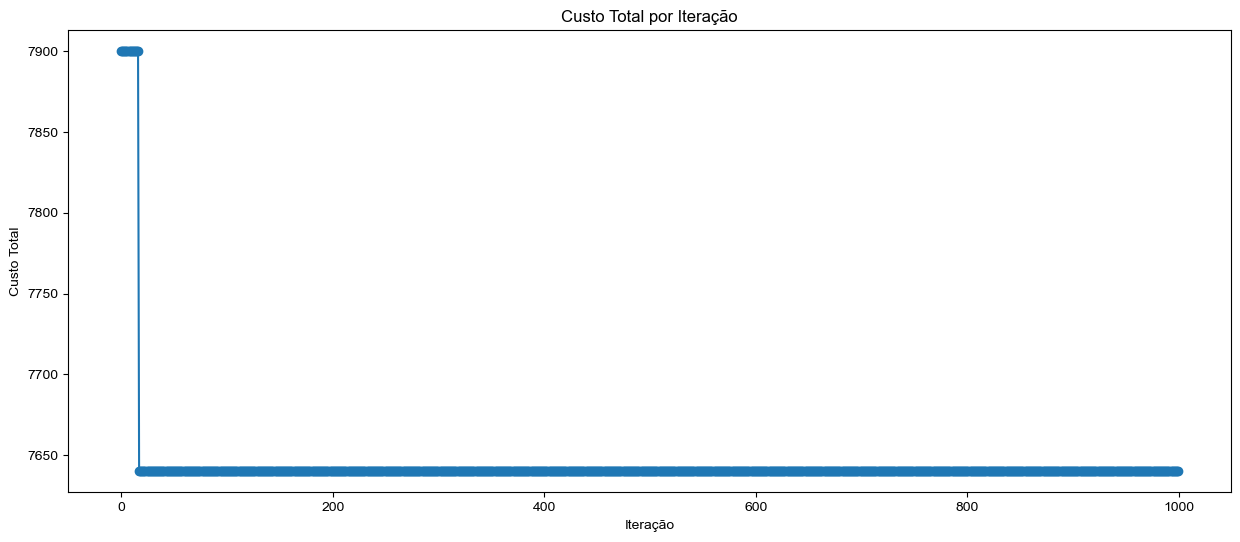

CPU times: total: 1min 37s
Wall time: 3min 22s


In [5]:
%%time
### Instância David
df_resultado_ils = ils(df_guloso_david,df_term_david,max_iteracoes_ils=1000,max_iteracoes_bl=200,mudancas_bl=6,n_mudancas=2,t_mudancas=1)

In [6]:
solucao_viavel(df_resultado_ils,df_term_david)

True

In [7]:
print(df_resultado_ils.custo.sum())
print(validador(df_resultado_ils,df_term_david))
print((df_resultado_ils.custo.sum()/df_guloso_david.custo.sum()-1)*100)

7640.0
Solução validada!
None
-3.2911392405063244


In [23]:
#df_resultado_ils.to_csv("df_resultado_ils_instancia_teste_091125.csv",index=False)